
### Mini Project Notebook: Employee Attrition Prediction

## **Note:** in-house Kaggle competition

## Problem Statement

To predict employee attrition using CatBoost and XgBoost 

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models. 

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps. 

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM. 

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records. 

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [1]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [ ]:
!pip -qq install catboost

### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') 
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv('/content/hr_employee_attrition_train.csv')

In [ ]:
# Check the shape of dataframe. 
# YOUR CODE HERE
df.shape

(1170, 35)

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [ ]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1170 non-null   int64 
 1   businesstravel            1170 non-null   object
 2   dailyrate                 1170 non-null   int64 
 3   department                1170 non-null   object
 4   distancefromhome          1170 non-null   int64 
 5   education                 1170 non-null   int64 
 6   educationfield            1170 non-null   object
 7   employeecount             1170 non-null   int64 
 8   employeenumber            1170 non-null   int64 
 9   environmentsatisfaction   1170 non-null   int64 
 10  gender                    1170 non-null   object
 11  hourlyrate                1170 non-null   int64 
 12  jobinvolvement            1170 non-null   int64 
 13  joblevel                  1170 non-null   int64 
 14  jobrole                 

In [ ]:
df.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,2,Female,93,2,2,Manufacturing Director,4,Married,5906,23888,0,Y,No,13,3,4,80,2,10,2,2,9,8,3,8,No
1,34,Travel_Rarely,970,Research & Development,8,2,Medical,1,757,2,Female,96,3,2,Healthcare Representative,3,Single,6142,7360,3,Y,No,11,3,4,80,0,10,2,3,5,1,4,3,No
2,39,Travel_Rarely,360,Research & Development,23,3,Medical,1,1310,3,Male,93,3,1,Research Scientist,1,Single,3904,22154,0,Y,No,13,3,1,80,0,6,2,3,5,2,0,3,Yes
3,26,Travel_Rarely,933,Sales,1,3,Life Sciences,1,476,3,Male,57,3,2,Sales Executive,3,Married,5296,20156,1,Y,No,17,3,2,80,1,8,3,3,8,7,7,7,No
4,40,Travel_Rarely,329,Research & Development,1,4,Life Sciences,1,1361,2,Male,88,3,1,Laboratory Technician,2,Married,2387,6762,3,Y,No,22,4,3,80,1,7,3,3,4,2,0,3,No


In [ ]:
cat_col,num_col = [],[]
for column in df.columns: 
    if df[column].dtype == 'object':
        cat_col.append(column)
    else:
        num_col.append(column)
print(cat_col)
print(num_col)
    

['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime', 'attrition']
['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


In [ ]:
df.isna().any()

age                         False
businesstravel              False
dailyrate                   False
department                  False
distancefromhome            False
education                   False
educationfield              False
employeecount               False
employeenumber              False
environmentsatisfaction     False
gender                      False
hourlyrate                  False
jobinvolvement              False
joblevel                    False
jobrole                     False
jobsatisfaction             False
maritalstatus               False
monthlyincome               False
monthlyrate                 False
numcompaniesworked          False
over18                      False
overtime                    False
percentsalaryhike           False
performancerating           False
relationshipsatisfaction    False
standardhours               False
stockoptionlevel            False
totalworkingyears           False
trainingtimeslastyear       False
worklifebalanc

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

** Create a box plot to check for outliers**

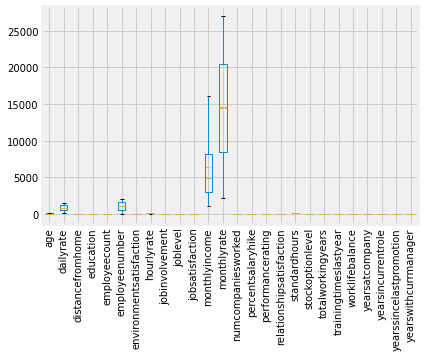

In [ ]:
# Check for outliers
# YOUR CODE HERE
#a1=df[['kCH4_sync','week_days']]
df.boxplot(meanline=True, showmeans=True, showcaps=True, showbox=True,            
                 showfliers=False)
plt.xticks(rotation=90)
plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
df.shape

(1170, 35)

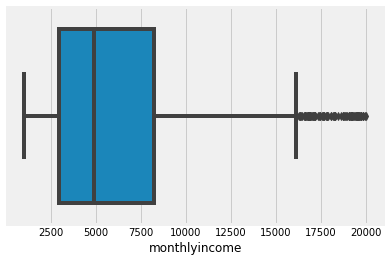

In [ ]:
sns.boxplot(df['monthlyincome'])

In [ ]:
# YOUR CODE HERE
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.shape

(1170, 35)

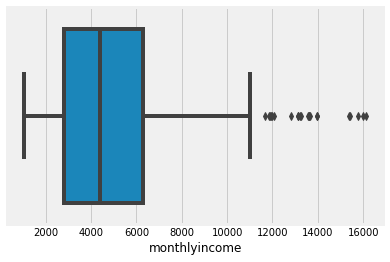

In [ ]:
# Recheck for outliers
# YOUR CODE HERE
sns.boxplot(df['monthlyincome'])

In [ ]:
#df.winsorize(df,.25,.75) # a scipy module 


### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
# YOUR CODE HERE
df['attrition'].value_counts()

No     981
Yes    189
Name: attrition, dtype: int64

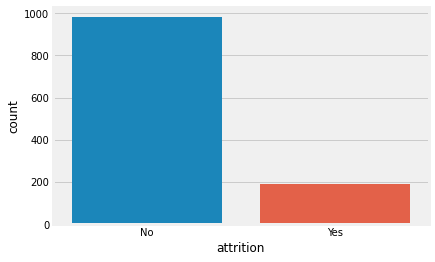

In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HEREs
sns.countplot(df['attrition'])

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

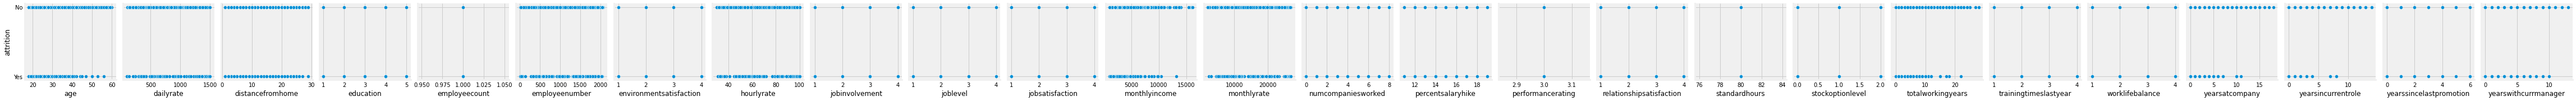

In [ ]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE


sns.pairplot(df,y_vars = ['attrition'])

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

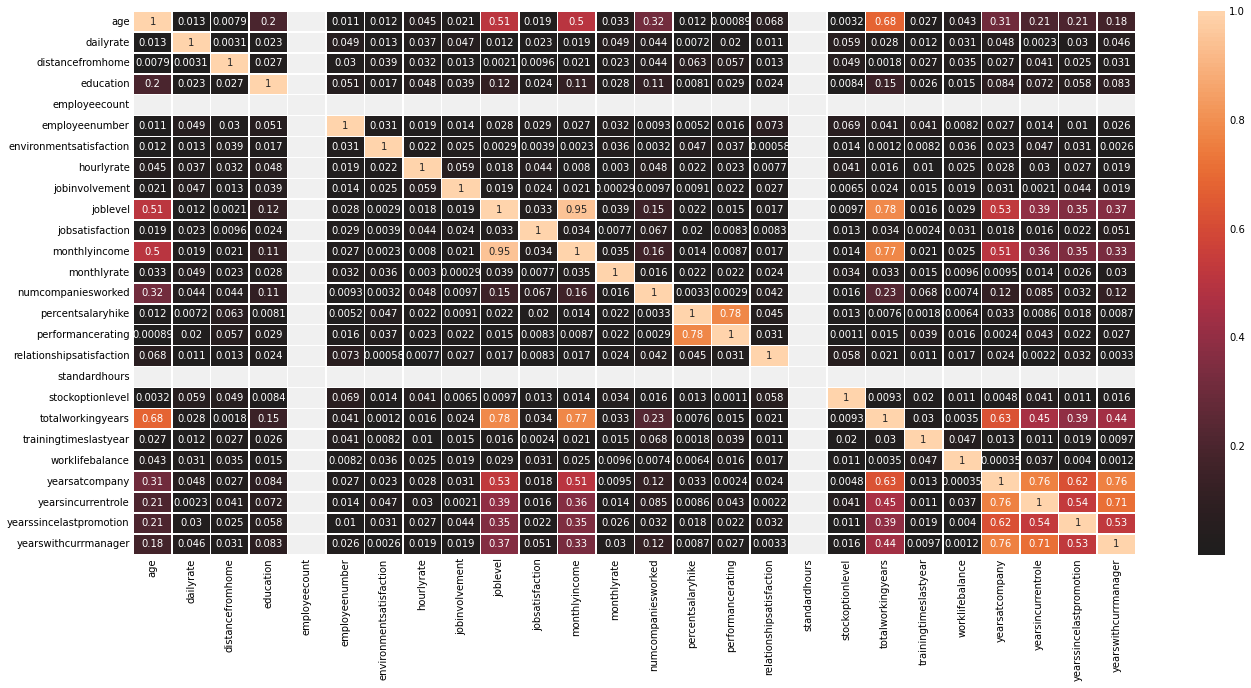

In [ ]:
# Visualize heatmap
# YOUR CODE HERE
plt.figure(figsize=(20, 10))
sns.heatmap(abs(df[num_col].corr()), annot=True, linewidth=0.5, center=0)
plt.show()

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
# YOUR CODE HERE
df[cat_col]

,businesstravel,department,educationfield,gender,jobrole,maritalstatus,over18,overtime,attrition
0,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Y,No,No
1,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Single,Y,No,No
2,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,Y,No,Yes
3,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married,Y,No,No
4,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Y,No,No
...,...,...,...,...,...,...,...,...,...
1165,Non-Travel,Research & Development,Technical Degree,Male,Research Scientist,Married,Y,No,No
1166,Travel_Rarely,Sales,Medical,Female,Manager,Married,Y,No,No
1167,Travel_Frequently,Research & Development,Technical Degree,Male,Research Scientist,Married,Y,No,No
1168,Non-Travel,Sales,Life Sciences,Male,Sales Executive,Single,Y,No,No


In [ ]:
for column in cat_col:
    print(df[column].unique())


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Research & Development' 'Sales' 'Human Resources']
['Life Sciences' 'Medical' 'Technical Degree' 'Other' 'Marketing'
 'Human Resources']
['Female' 'Male']
['Manufacturing Director' 'Healthcare Representative' 'Research Scientist'
 'Sales Representative' 'Sales Executive' 'Laboratory Technician'
 'Human Resources' 'Manager' 'Research Director']
['Married' 'Single' 'Divorced']
['Y']
['No' 'Yes']
['No' 'Yes']


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer

# # num_pipeline = Pipeline([
# #     ('std_scaler', StandardScaler()),
# #     ])

# full_pipeline = ColumnTransformer([
#     ("cat", OneHotEncoder(), cat_col),
# ])


# df2 = full_pipeline.fit_transform(df)

In [ ]:
df.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,45,Travel_Rarely,556,Research & Development,25,2,Life Sciences,1,1888,2,Female,93,2,2,Manufacturing Director,4,Married,5906,23888,0,Y,No,13,3,4,80,2,10,2,2,9,8,3,8,No
1,34,Travel_Rarely,970,Research & Development,8,2,Medical,1,757,2,Female,96,3,2,Healthcare Representative,3,Single,6142,7360,3,Y,No,11,3,4,80,0,10,2,3,5,1,4,3,No
2,39,Travel_Rarely,360,Research & Development,23,3,Medical,1,1310,3,Male,93,3,1,Research Scientist,1,Single,3904,22154,0,Y,No,13,3,1,80,0,6,2,3,5,2,0,3,Yes
3,26,Travel_Rarely,933,Sales,1,3,Life Sciences,1,476,3,Male,57,3,2,Sales Executive,3,Married,5296,20156,1,Y,No,17,3,2,80,1,8,3,3,8,7,7,7,No
4,40,Travel_Rarely,329,Research & Development,1,4,Life Sciences,1,1361,2,Male,88,3,1,Laboratory Technician,2,Married,2387,6762,3,Y,No,22,4,3,80,1,7,3,3,4,2,0,3,No


In [ ]:
df2 = pd.get_dummies(df, columns = cat_col, drop_first = True)
df2.head()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition_Yes
0,45,556,25,2,1,1888,2,93,2,2,4,5906,23888,0,13,3,4,80,2,10,2,2,9,8,3,8,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,34,970,8,2,1,757,2,96,3,2,3,6142,7360,3,11,3,4,80,0,10,2,3,5,1,4,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,39,360,23,3,1,1310,3,93,3,1,1,3904,22154,0,13,3,1,80,0,6,2,3,5,2,0,3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
3,26,933,1,3,1,476,3,57,3,2,3,5296,20156,1,17,3,2,80,1,8,3,3,8,7,7,7,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,40,329,1,4,1,1361,2,88,3,1,2,2387,6762,3,22,4,3,80,1,7,3,3,4,2,0,3,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
df2.columns

Index(['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'businesstravel_Travel_Frequently', 'businesstravel_Travel_Rarely',
       'department_Research & Development', 'department_Sales',
       'educationfield_Life Sciences', 'educationfield_Marketing',
       'educationfield_Medical', 'educationfield_Other',
       'educationfield_Technical Degree', 'gender_Male',
       'jobrole_Human Resources', 'jobrole_Laboratory Technician',
       'jobrole_Manager', 'jobrole_Manufacturing Director',
  

In [ ]:
df2 = df2.drop(["employeecount","standardhours"], axis=1)

In [ ]:
X_train=df2.drop(['attrition_Yes'],axis = 1)
y_train = df2['attrition_Yes']

In [ ]:
test = pd.read_csv('/content/hr_employee_attrition_test.csv').drop(['id'],axis = 1)

In [ ]:
test.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,28,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,4,Male,74,3,1,Sales Representative,2,Married,1052,23384,1,Y,No,22,4,2,80,0,1,5,3,1,0,0,0
1,32,Travel_Frequently,585,Research & Development,10,3,Life Sciences,1,1720,1,Male,56,3,1,Research Scientist,3,Married,3433,17360,6,Y,No,13,3,1,80,1,10,3,2,5,2,1,3
2,41,Travel_Rarely,1085,Research & Development,2,4,Life Sciences,1,927,2,Female,57,1,1,Laboratory Technician,4,Divorced,2778,17725,4,Y,Yes,13,3,3,80,1,10,1,2,7,7,1,0
3,42,Travel_Rarely,557,Research & Development,18,4,Life Sciences,1,1998,4,Male,35,3,2,Research Scientist,1,Divorced,5410,11189,6,Y,Yes,17,3,3,80,1,9,3,2,4,3,1,2
4,41,Travel_Frequently,1018,Sales,1,3,Marketing,1,1349,3,Female,66,3,2,Sales Executive,1,Divorced,4103,4297,0,Y,No,17,3,4,80,1,10,2,3,9,3,1,7


In [ ]:
test = pd.get_dummies(test, drop_first = True)
test.head()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Research & Development,department_Sales,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Male,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Married,maritalstatus_Single,overtime_Yes
0,28,1144,10,1,1,1056,4,74,3,1,2,1052,23384,1,22,4,2,80,0,1,5,3,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,32,585,10,3,1,1720,1,56,3,1,3,3433,17360,6,13,3,1,80,1,10,3,2,5,2,1,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,41,1085,2,4,1,927,2,57,1,1,4,2778,17725,4,13,3,3,80,1,10,1,2,7,7,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,42,557,18,4,1,1998,4,35,3,2,1,5410,11189,6,17,3,3,80,1,9,3,2,4,3,1,2,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,41,1018,1,3,1,1349,3,66,3,2,1,4103,4297,0,17,3,4,80,1,10,2,3,9,3,1,7,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test.columns

Index(['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'businesstravel_Travel_Frequently', 'businesstravel_Travel_Rarely',
       'department_Research & Development', 'department_Sales',
       'educationfield_Life Sciences', 'educationfield_Marketing',
       'educationfield_Medical', 'educationfield_Other',
       'educationfield_Technical Degree', 'gender_Male',
       'jobrole_Human Resources', 'jobrole_Laboratory Technician',
       'jobrole_Manager', 'jobrole_Manufacturing Director',
  

In [ ]:
test = test.drop(["employeecount","standardhours"], axis=1)

Optional: 
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters. 

Refer to the Additional Notebook: CatBoost parameter tuning (CDS-B4 GDrive -> Module 2 -> Assignments -> Aug 13)

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance. 

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:** 
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create CatBoost model
# YOUR CODE HERE
class_weights = dict({0:1, 1:5})
CatBoost_clf = CatBoostClassifier(iterations=10,
                                  learning_rate=0.1,
                                  class_weights= class_weights,
                                  eval_metric= "Recall",
                                  #loss_function='CrossEntropy'
                                  )

In [ ]:
# Model training
# YOUR CODE HERE
CatBoost_clf.fit(X_train, y_train,
                 #cat_features=cat_features,
                 verbose = False)

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE   
cbr_prediction = CatBoost_clf.predict(test)
#print('Accuracy Score: ', accuracy_score(y_test, cbr_prediction))
print(cbr_prediction)


[1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0]


In [ ]:
submit = pd.DataFrame(cbr_prediction, columns = ['label'])
submit.index = range(1,len(submit)+1)
submit.reset_index (inplace = True)
submit.rename(columns = {'index' : 'id'}, inplace = True)
submit.to_csv('submit_cat_dropped.csv', index = False)

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss. 

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Use pd.get_dummies

In [ ]:
#!pip -qq install hyperopt

In [ ]:
#gridsearch 
params = {
        'learning_rate' : [.001, 0.02, 0.05, .1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


In [ ]:
xgb = XGBClassifier(n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold


In [ ]:

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f2fd1ba2e50>,
                   estimator=XGBClassifier(n_estimators=600, nthread=1,
                                           silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.001, 0.02, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
#results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([3.39375544, 2.54321488, 3.09234428, 1.82259091, 1.91529695]), 'std_fit_time': array([0.03555097, 0.477268  , 0.03964884, 0.02039399, 0.21734251]), 'mean_score_time': array([0.10244727, 0.04906289, 0.02994482, 0.02107596, 0.01125129]), 'std_score_time': array([0.00841627, 0.02897508, 0.00471392, 0.00278019, 0.00705944]), 'param_subsample': masked_array(data=[0.8, 1.0, 0.8, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 10, 10, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 4, 5, 4, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.001, 0.02, 0.001, 0.05, 0.02],
             mask=[False, False, False, False, False],
       fill_

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column
# YOUR CODE HERE 

In [ ]:
# Feature Space
# YOUR CODE HERE

# Targer label
# YOUR CODE HERE

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:** 
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create XGBoost classifier model
# YOUR CODE HERE
XGB_clf = XGBClassifier(colsample_bytree=0.6, gamma=1.5, learning_rate=0.05, max_depth=4,
              min_child_weight=10, n_estimators=600, nthread=1, silent=True,
              subsample=0.8)

In [ ]:
# Model training
# YOUR CODE HERE
XGB_clf.fit(X_train, y_train,
            verbose = False)

XGBClassifier(colsample_bytree=0.6, gamma=1.5, learning_rate=0.05, max_depth=4,
              min_child_weight=10, n_estimators=600, nthread=1, silent=True,
              subsample=0.8)

### Model Performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE   
XGB_prediction = XGB_clf.predict(test)
#print('Accuracy Score: ', accuracy_score(y_test, XGB_prediction))


In [ ]:
print(XGB_prediction)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
submit = pd.DataFrame(XGB_prediction, columns = ['label'])
submit.index = range(1,len(submit)+1)
submit.reset_index (inplace = True)
submit.rename(columns = {'index' : 'id'}, inplace = True)

In [ ]:
# submit.rename(columns = {'index' : 'id'}, inplace = True)

In [ ]:
submit.to_csv('submit_XGB_dropped.csv', index = False)

In [ ]:
# print('Classification Report for XGBoost:')
# print(classification_report(y_test, XGB_prediction))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       130
           1       0.69      0.35      0.46        26

    accuracy                           0.87       156
   macro avg       0.79      0.66      0.69       156
weighted avg       0.85      0.87      0.85       156



## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss). 

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
LGBM_clf = LGBMClassifier(colsample_bytree=0.6, gamma=1.5, learning_rate=0.05, max_depth=4,
              min_child_weight=10, n_estimators=600, nthread=1, silent=True,
              subsample=0.8)

In [ ]:
# Fit on training set
LGBM_clf.fit(X_train, y_train,
             verbose = False)

LGBMClassifier(colsample_bytree=0.6, gamma=1.5, learning_rate=0.05, max_depth=4,
               min_child_weight=10, n_estimators=600, nthread=1, subsample=0.8)

In [ ]:
LGBM_prediction = LGBM_clf.predict(test)


In [ ]:
submit = pd.DataFrame(LGBM_prediction, columns = ['label'])
submit.index = range(1,len(submit)+1)
submit.reset_index (inplace = True)
submit.rename(columns = {'index' : 'id'}, inplace = True)
submit.to_csv('submitLGBM_tuned.csv', index = False)

### Model Definition

**Hint:** 
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE 

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results 

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE
cat_pred  = pd.read_csv('/content/submit_cat_dropped.csv')
xgb_pred = pd.read_csv('/content/submit_XGB_dropped.csv')

In [ ]:
xgb_pred.rename(columns = {'label':'xgb_label'},inplace = True)

In [ ]:
xgb_pred.columns

Index(['id', 'xgb_label'], dtype='object')

In [ ]:
pd.concat([cat_pred, xgb_pred], axis = 1)

,id,label,id,xgb_label
0,1,1,1,0
1,2,0,2,0
2,3,1,3,0
3,4,1,4,0
4,5,0,5,0
...,...,...,...,...
295,296,0,296,0
296,297,0,297,0
297,298,0,298,0
298,299,0,299,0


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/